# 相对强度RPS择时策略

In [15]:
source_code1 = """
import matplotlib.pyplot as plt
# 源代码-相对强度RPS择时策略
import pandas as pd
#初始化账户       
def init(context):      
    # 设置要交易的股票      
    context.security = '000300.SH'   
    # 相对强度RPS系数
    context.N = 60
    context.M = 5
    #设置买卖条件，每个交易频率（日/分钟/tick）调用一次   
    # 记录每分钟的各个均线值
    g.y = []
    g.x = []
    


def handle_bar(context,bar_dict):
    # 获取收盘价价格
    data = history(context.security, ['close'], context.N, '1d')
    # 计算相对强度RPS
    rps = (data['close'] - data['close'].rolling(context.N,min_periods=0).min()) / (data['close'].rolling(context.N,min_periods=0).max() - data['close'].rolling(context.N,min_periods=0).min())
    # 计算相对强度RPS均值
    rps_10 = pd.rolling_mean(rps,context.M)
    # 持股市值
    value = context.portfolio.stock_account.market_value
    # 若均值为正，则买入或持仓
    if rps_10.values[-1] >=0.9 and value==0:
        # 买入
        order_target_percent(context.security,1)
        # 打印
        print('当前RPS值{},买入{}'.format(rps_10.values[-1],context.security))
    # 若均值为负，则卖出或空仓
    if rps_10.values[-1] <= 0.5 and value>0:
        # 卖出
        order_target(context.security,0)
        # 打印
        print('当前RPS值{},卖出{}'.format(rps_10.values[-1],context.security))
    g.y = (rps_10)
    g.x = range(len(g.y))
        
        
# 收盘后运行函数,用于储存自定义参数、全局变量,执行盘后选股等
def after_trading(context):
    #获取时间
    time = get_datetime().strftime('%Y-%m-%d %H:%M:%S')
    #print(str(time)[:10])
    # 打印时间
    if str(time)[:10]=='2022-06-10':
        fig = plt.figure(figsize=(20,8),dpi=80)
        plt.plot(g.x, g.y)                    
        plt.show()
    #log.info(context.M, '日相对强度RPS均值=', g.y[-1], '{} 盘后运行'.format(time))
    print(context.M, '日相对强度RPS均值=', g.y[-1])
    log.info('一天结束')        

        
"""

# 系统重置
try:
    import shutil
    shutil.rmtree('persist/研究环境策略')
except:
    pass


2022-05-05 15:30:00.000000 - INFO - 5 日相对强度RPS均值= 0.11072755973878881
2022-05-05 15:30:00.000000 - INFO - 一天结束
2022-05-06 15:30:00.000000 - INFO - 5 日相对强度RPS均值= 0.16282565717881092
2022-05-06 15:30:00.000000 - INFO - 一天结束
2022-05-09 15:30:00.000000 - INFO - 5 日相对强度RPS均值= 0.19155921985950436
2022-05-09 15:30:00.000000 - INFO - 一天结束
2022-05-10 15:30:00.000000 - INFO - 5 日相对强度RPS均值= 0.1873884990582888
2022-05-10 15:30:00.000000 - INFO - 一天结束
2022-05-11 15:30:00.000000 - INFO - 5 日相对强度RPS均值= 0.18710301885692482
2022-05-11 15:30:00.000000 - INFO - 一天结束
2022-05-12 15:30:00.000000 - INFO - 5 日相对强度RPS均值= 0.17809707121077198
2022-05-12 15:30:00.000000 - INFO - 一天结束
2022-05-13 15:30:00.000000 - INFO - 5 日相对强度RPS均值= 0.16622548770867995
2022-05-13 15:30:00.000000 - INFO - 一天结束
2022-05-16 15:30:00.000000 - INFO - 5 日相对强度RPS均值= 0.18462791598817213
2022-05-16 15:30:00.000000 - INFO - 一天结束
2022-05-17 15:30:00.000000 - INFO - 5 日相对强度RPS均值= 0.2028726260384997
2022-05-17 15:30:00.000000 - INFO - 一天结束
202

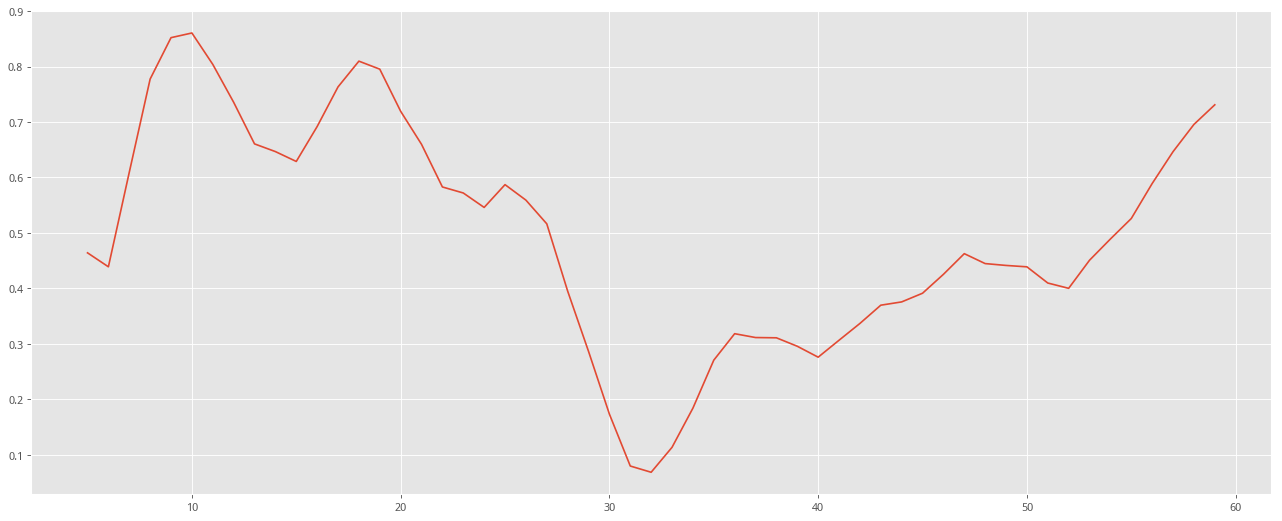

2022-06-10 15:30:00.000000 - INFO - 5 日相对强度RPS均值= 0.7311112765860918
2022-06-10 15:30:00.000000 - INFO - 一天结束
2022-06-13 15:30:00.000000 - INFO - 5 日相对强度RPS均值= 0.7883183426400244
2022-06-13 15:30:00.000000 - INFO - 一天结束


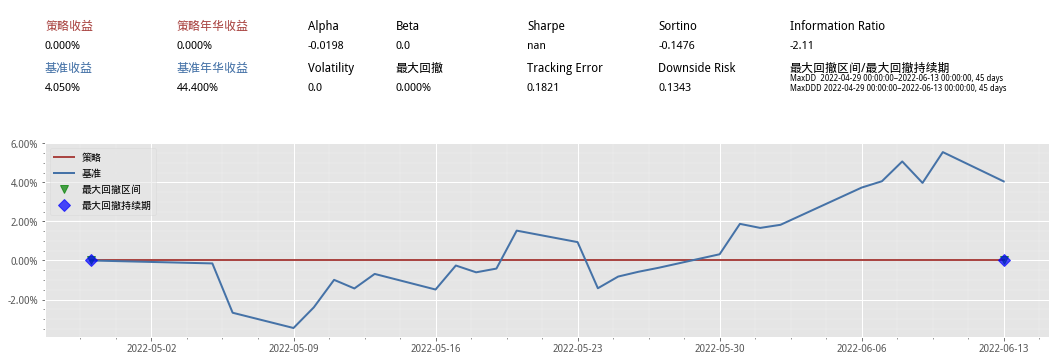

{'analyser': {'benchmark_portfolio':                 close  unit_net_value
  2022-04-29  4016.2410        1.000000
  2022-05-05  4010.2102        0.998498
  2022-05-06  3908.8150        0.973252
  2022-05-09  3877.4364        0.965439
  2022-05-10  3919.8684        0.976004
  2022-05-11  3976.4231        0.990086
  2022-05-12  3958.7400        0.985683
  2022-05-13  3988.6002        0.993118
  2022-05-16  3956.5378        0.985135
  2022-05-17  4005.8934        0.997424
  2022-05-18  3991.9069        0.993941
  2022-05-19  3999.5984        0.995856
  2022-05-20  4077.5998        1.015278
  2022-05-23  4053.9823        1.009397
  2022-05-24  3959.1541        0.985786
  2022-05-25  3983.1784        0.991768
  2022-05-26  3993.0446        0.994224
  2022-05-27  4001.2988        0.996280
  2022-05-30  4029.0179        1.003181
  2022-05-31  4091.5176        1.018743
  2022-06-01  4083.1772        1.016666
  2022-06-02  4089.5682        1.018258
  2022-06-06  4166.0850        1.037310
  202

In [16]:
# 模拟运行
#rtrade = research_trade('研究环境策略', source_code1, capital_base=float(50000), frequency='MINUTE', trade_api=trade_api)#trade_api可传入List[TradeAPI]，实现多账户交易


# 回测运行
#research_strategy(source_code, start_date=None, end_date=None, capital_base=1000000, frequency='DAILY', stock_market='STOCK', benchmark=None)

#research_strategy(source_code1, start_date='20180901', end_date='20220607', capital_base=float(500000), frequency='MINUTE', stock_market='STOCK', benchmark=None)

research_strategy(source_code1, start_date='20220501', end_date='20220613', capital_base=float(500000), frequency='DAILY', stock_market='STOCK', benchmark=None)


为了提升数据的准确性，将某个点的取值扩大到包含这个点的一段区间，用区间来进行判断，这个区间就是窗口。移动窗口就是窗口向一端滑行，默认是从右往左，每次滑行并不是区间整块的滑行，而是一个单位一个单位的滑行。上面的例子可以看出，前两个值都是非NAN值，计数为2，第三个值为空，所以加上第三个单位后计数仍未2，依次类推…

首先我们设置的窗口window=5，也就是5个数取一个和。index 0,1 ,2,3为NaN，是因为它们前面都不够5个数。等到index4 的时候，它的值是怎么算的呢，index4 = index0+index1+index2+index3+index4
3. rolling.mean():计算移动窗口的均值
4. rolling.median():计算移动窗口的中位数
5. rolling.var()：移动窗口的方差
6. rolling.corr:移动窗口的相关系数
还有方差var,标准差std,协方差cov,最大值max,最小值min等的函数应用方法同上

In [ ]:
import pandas as pd
import numpy as np
s = pd.Series([2, 3, 4, 10,3,4,6,9])
s1 = s.rolling(5).sum()
# print(s1)
# s1 = s.rolling(5).count()
# print(s1)
# s1 = s.rolling(5).max()
# print(s1)
# s1 = s.rolling(5).min()
# print(s1)
# s1 = s.rolling(5).mean()
# print(s1)
s1 = s.rolling(5).cov()
print(s1)
s1 = s.rolling(5).var()
print(s1)
s1 = s.rolling(5).std()
print(s1)
s1 = s.rolling(5).median()
print(s1)